# Task

Inputs: The power spectrum of an audio clip at a particular time.
The size of window is determined by the number of samples inside a quanta.

Outputs: An 88-dimensional vector, containing probabilities of whether or not a particular note was played.

In [ ]:
import tensorflow as tf 
from tensorflow.keras import layers, models, metrics

import numpy as np 
import scipy as sp 
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "../")

import midiio
import frequency_analysis as frqa
from midi.midi_representation import *
from musicnet_extractor import *

## Preprocessing step

In [2]:
training_data = get_data("../data/musicnet/1727.wav", "../data/musicnet/1727.csv").append(
                get_data("../data/musicnet/1759.wav", "../data/musicnet/1759.csv"))
training_data

# Model Creation

In [8]:
def jaccard_distance(y_true, y_pred, smooth=100):
    """ Calculates mean of Jaccard distance as a loss function """
    intersection = tf.reduce_sum(y_true * y_pred)
    sum_ = tf.reduce_sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    jd =  (1 - jac) * smooth 
    return tf.reduce_mean(jd)

In [9]:
inputs = np.copy(training_data[input_columns])
labels = np.copy(training_data[label_columns])


In [10]:
# We create a tensorflow model as follows

note_classifier = models.Sequential()

note_classifier.add(layers.Dense(200, activation=tf.nn.leaky_relu, input_shape=(257,)))
note_classifier.add(layers.Dense(200, activation=tf.nn.softplus))
note_classifier.add(layers.Dense(108, activation=tf.nn.leaky_relu))
note_classifier.add(layers.Lambda(lambda x: tf.nn.softplus(x)))


note_classifier.compile(optimizer="sgd", loss=jaccard_distance)

In [11]:
note_classifier.fit(inputs, labels, batch_size=100, epochs=1000)

Epoch 1/1000
129/129 [==============================] - 2s 4ms/step - loss: 97.9100
Epoch 2/1000
129/129 [==============================] - 0s 3ms/step - loss: 96.8626
Epoch 3/1000
129/129 [==============================] - 0s 3ms/step - loss: 84.4880
Epoch 4/1000
129/129 [==============================] - 0s 3ms/step - loss: 47.6086
Epoch 5/1000
129/129 [==============================] - 0s 3ms/step - loss: 41.2618
Epoch 6/1000
129/129 [==============================] - 0s 3ms/step - loss: 38.7282
Epoch 7/1000
129/129 [==============================] - 0s 3ms/step - loss: 38.1028
Epoch 8/1000
129/129 [==============================] - 0s 3ms/step - loss: 38.0862
Epoch 9/1000
129/129 [==============================] - 0s 3ms/step - loss: 37.9702
Epoch 10/1000
129/129 [==============================] - 0s 3ms/step - loss: 37.9042
Epoch 11/1000
129/129 [==============================] - 0s 3ms/step - loss: 37.8873
Epoch 12/1000
129/129 [==============================] - 0s 3ms/step - los

KeyboardInterrupt: 

# Model Evaluation

In [268]:
test_data = get_data('../data/musicnet/1759.wav', '../data/musicnet/1759.csv')
test_data

,start_time,20,21,22,23,24,25,26,27,28,...,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256
0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.205164e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.410328e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.615492e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.820657e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,8.573678e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3889,8.575883e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3890,8.578089e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3891,8.580294e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
test_input = np.copy(test_data[input_columns])
test_labels = np.copy(test_data[label_columns])
result = note_classifier.evaluate(test_input, test_labels, batch_size=64)
result

61/61 [==============================] - 0s 4ms/step - loss: 0.3870


0.38703128695487976

In [12]:
# Save the model

note_classifier.save("note_classifier.h5", )

# Unsupervised Task

In [13]:
# Load a model
classifier_model = models.load_model("note_classifier.h5", custom_objects={
    "jaccard_distance": jaccard_distance
})
classifier_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               51600     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 108)               21708     
_________________________________________________________________
lambda (Lambda)              (None, 108)               0         
Total params: 113,508
Trainable params: 113,508
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Load the file
data, sample_rate = midiio.read_file("../data/piano.mp3")
WINDOW_SAMPLES = sample_rate * 0.05

data = data[0]
xs = np.linspace(0, len(data), int (len(data) / WINDOW_SAMPLES), endpoint=False)
inputs = []
for x in xs:
    f, power = frqa.get_frequencies(data[int(x) : int(x + WINDOW_SAMPLES)], sample_rate)
    inputs.append(np.abs(power))

inputs = np.array(inputs)
inputs.shape

c:\Users\JOAQUIN DELA ROSA\anaconda3\envs\tfgpu\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


(4706, 257)

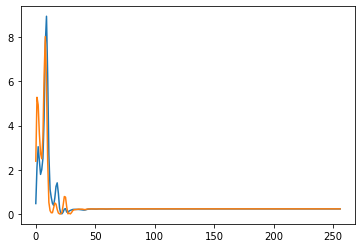

In [15]:
# Use the model to identify the notes
plt.plot(inputs[1000])
plt.plot(inputs[1010])



In [16]:
label_vector = classifier_model.predict(inputs)

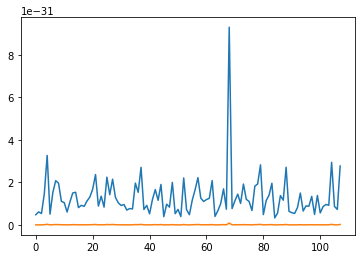

In [17]:
THRESHOLD = 0.005

plt.plot(label_vector[1000])
plt.plot(label_vector[3000])


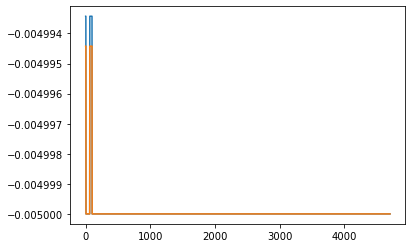

In [18]:

plt.plot(label_vector.max(axis=1) - THRESHOLD)
plt.plot(label_vector.min(axis=1) - THRESHOLD)


In [36]:
# Make the midi file :))

comp : Composition = Composition("Worse Apple")
comp.add_track(1, 1000)
track : Track= comp.tracks[0]

track.add_tempo_event(0, 130)
i = 0

virtual_keyboard = [0 for i in range(MIDI_START, MIDI_END + 1)]
for x in xs:
    note_vec = np.copy(label_vector[i])
    note_vec[note_vec > THRESHOLD] = 1
    note_vec[note_vec <= THRESHOLD] = 0

    print(note_vec.sum())

    for y in range(MIDI_START, MIDI_END + 1):
        if note_vec[y - MIDI_START] == 1 and virtual_keyboard[y - MIDI_START] != 1:
            track.add_note_on_event(int(x), 1, y, 120)
            virtual_keyboard[y - MIDI_START] = 1
        else: 
            track.add_note_off_event(int(x), 1, y)
            virtual_keyboard[y - MIDI_START] = 0
    i = i + 1

2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [37]:
make_midi(comp)